# **Importing Libraries**

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import torch

# Load the Dataset

In [24]:
path = "../data/raw/energy_data_set.csv"
data = pd.read_csv(path)

In [25]:
#Display first five records
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [26]:
print(data.head())

                  date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3  2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...         T9   RH_9     T_out  Press_mm_hg  \
0  19.79  44.730000  19.000000  ...  17.033333  45.53  6.600000        733.5   
1  19.79  44.790000  19.000000  ...  17.066667  45.56  6.483333        733.6   
2  19.79  44.933333  18.926667  ...  17.000000  45.50  6.366667        733.7   
3  19.79  45.000000  18.890000  ...  17.000000  45.40  6.250000        733.8   
4  19.79  45.000000  18.890000  ...  17.000000  45.40  6.133333        733.9   

   RH_out  Windspeed  Visibility

In [27]:
# Shape of the dataset(number of rows & number of columns)
data.shape

(19735, 29)

In [28]:
# Printing column types of the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [29]:
# Statistical summary of each column
print(data.describe())

         Appliances        lights            T1          RH_1            T2  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      97.694958      3.801875     21.686571     40.259739     20.341219   
std      102.524891      7.935988      1.606066      3.979299      2.192974   
min       10.000000      0.000000     16.790000     27.023333     16.100000   
25%       50.000000      0.000000     20.760000     37.333333     18.790000   
50%       60.000000      0.000000     21.600000     39.656667     20.000000   
75%      100.000000      0.000000     22.600000     43.066667     21.500000   
max     1080.000000     70.000000     26.260000     63.360000     29.856667   

               RH_2            T3          RH_3            T4          RH_4  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      40.420420     22.267611     39.242500     20.855335     39.026904   
std        4.069813      2.006111      3.254576    

# Visualizing the line and heatmap graphs

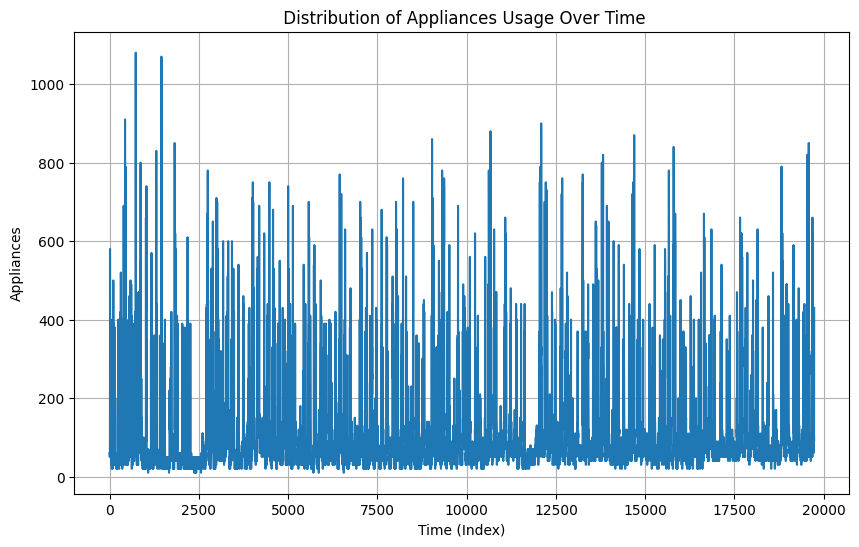

In [30]:
# Line chart for target column
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Appliances'])
plt.title(' Distribution of Appliances Usage Over Time')
plt.xlabel('Time (Index)')
plt.ylabel('Appliances')
plt.grid(True)
plt.show()

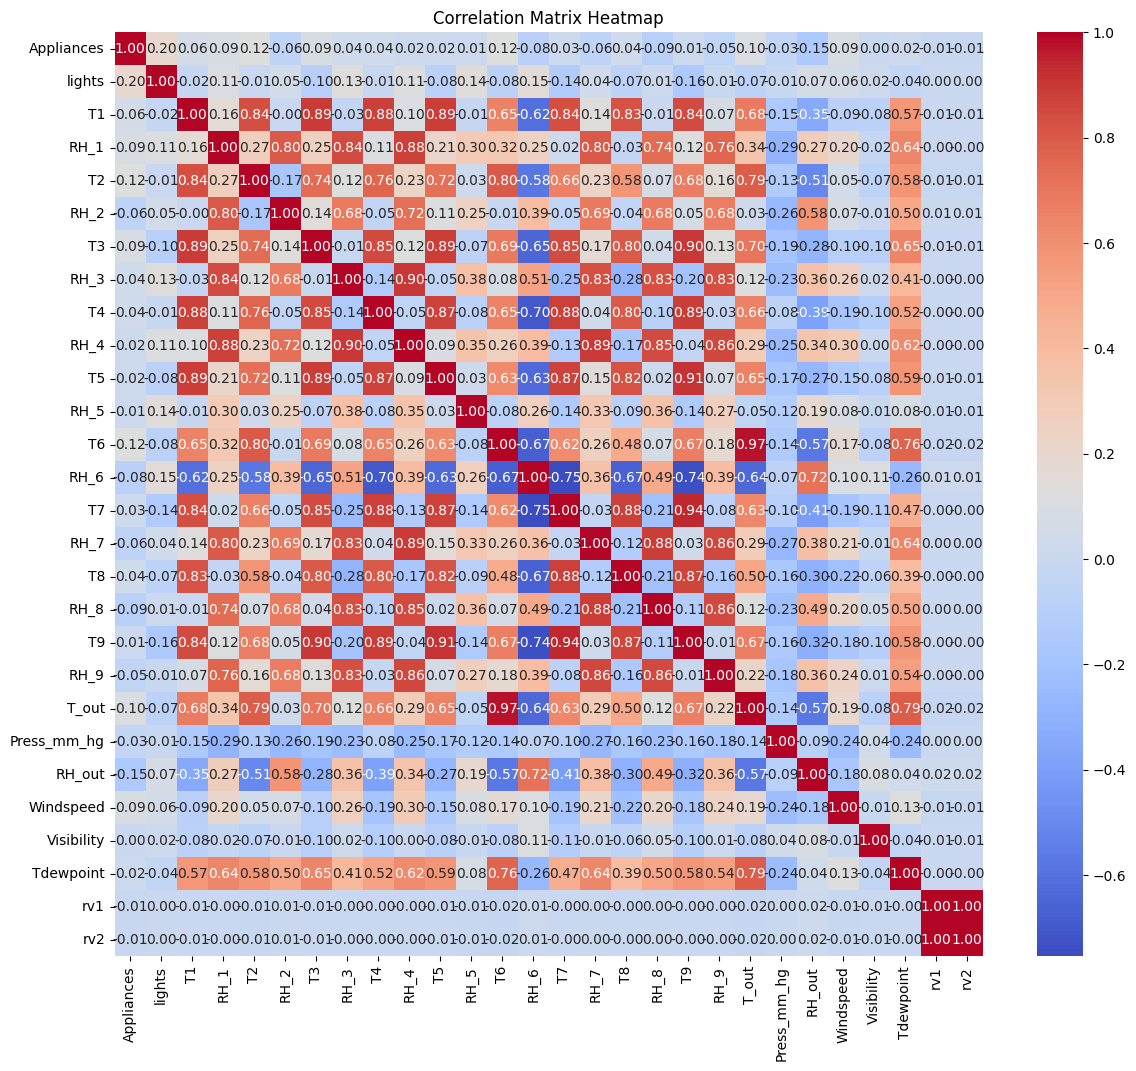

In [31]:
# Heatmap
plt.figure(figsize=(14, 12))
correlation_matrix = data.drop(columns=['date']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

****

# **Data Preprocessing**

## **Checking Null Values**

In [32]:
null_values = data.isna().sum()
print(null_values)

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64


*There are no null / missing values in entire dataset*

## **Checking Duplicate records**

In [33]:
duplicate_records = data[data.duplicated()]
print(duplicate_records)

Empty DataFrame
Columns: [date, Appliances, lights, T1, RH_1, T2, RH_2, T3, RH_3, T4, RH_4, T5, RH_5, T6, RH_6, T7, RH_7, T8, RH_8, T9, RH_9, T_out, Press_mm_hg, RH_out, Windspeed, Visibility, Tdewpoint, rv1, rv2]
Index: []

[0 rows x 29 columns]


*There are no duplicacted records in entire dataset*

## **Extracting Numerical columns**

In [34]:
numerical_columns = data.select_dtypes(include=np.number).columns.drop('lights', errors='ignore')
print(numerical_columns)

Index(['Appliances', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4',
       'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9',
       'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')


### **Visualizing Distribution diagram for all numerical columns**

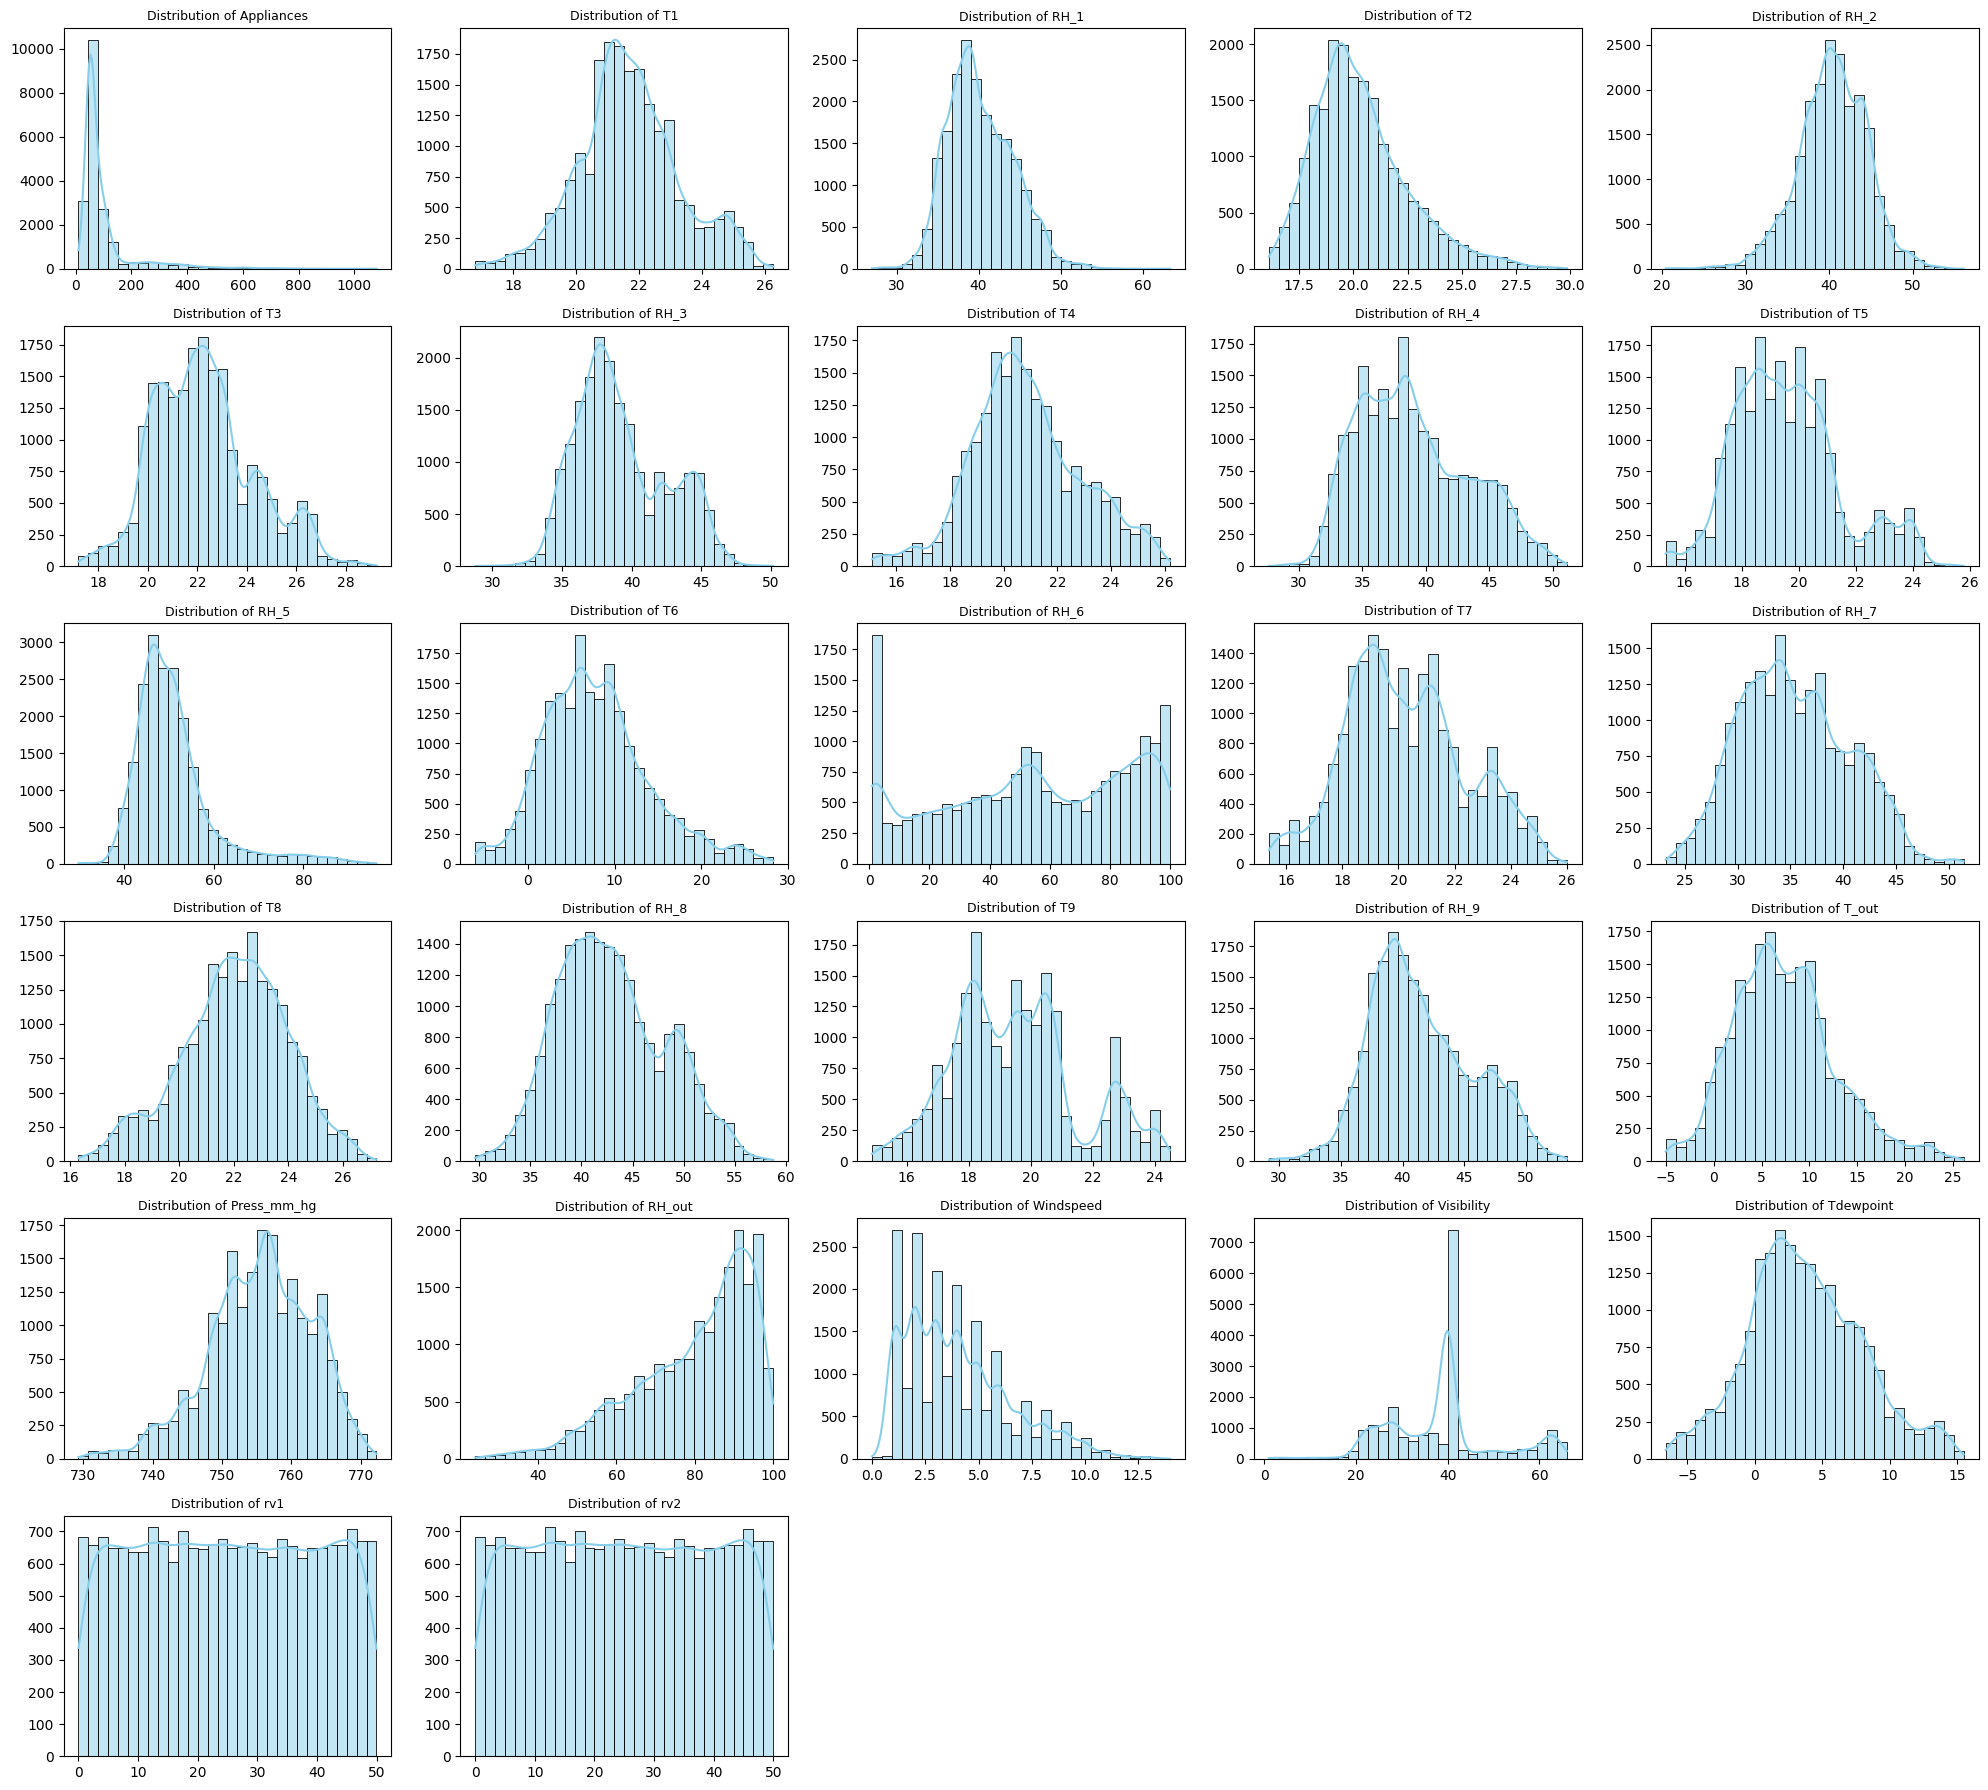

In [35]:
# Distribution diagram for all numerical columns

# Grid size (adjust as needed)
row_count = 6
column_count = 5

plt.figure(figsize=(20, 18))  # Overall figure size

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(row_count, column_count, i)
    sns.histplot(data[col], kde=True, bins=30, color='skyblue')  # using histplot as distplot is deprecated
    plt.title(f'Distribution of {col}', fontsize=9)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()


## **Outlier Detection and Treatment**

### **Visualizing box plot diagram for numerical columns**

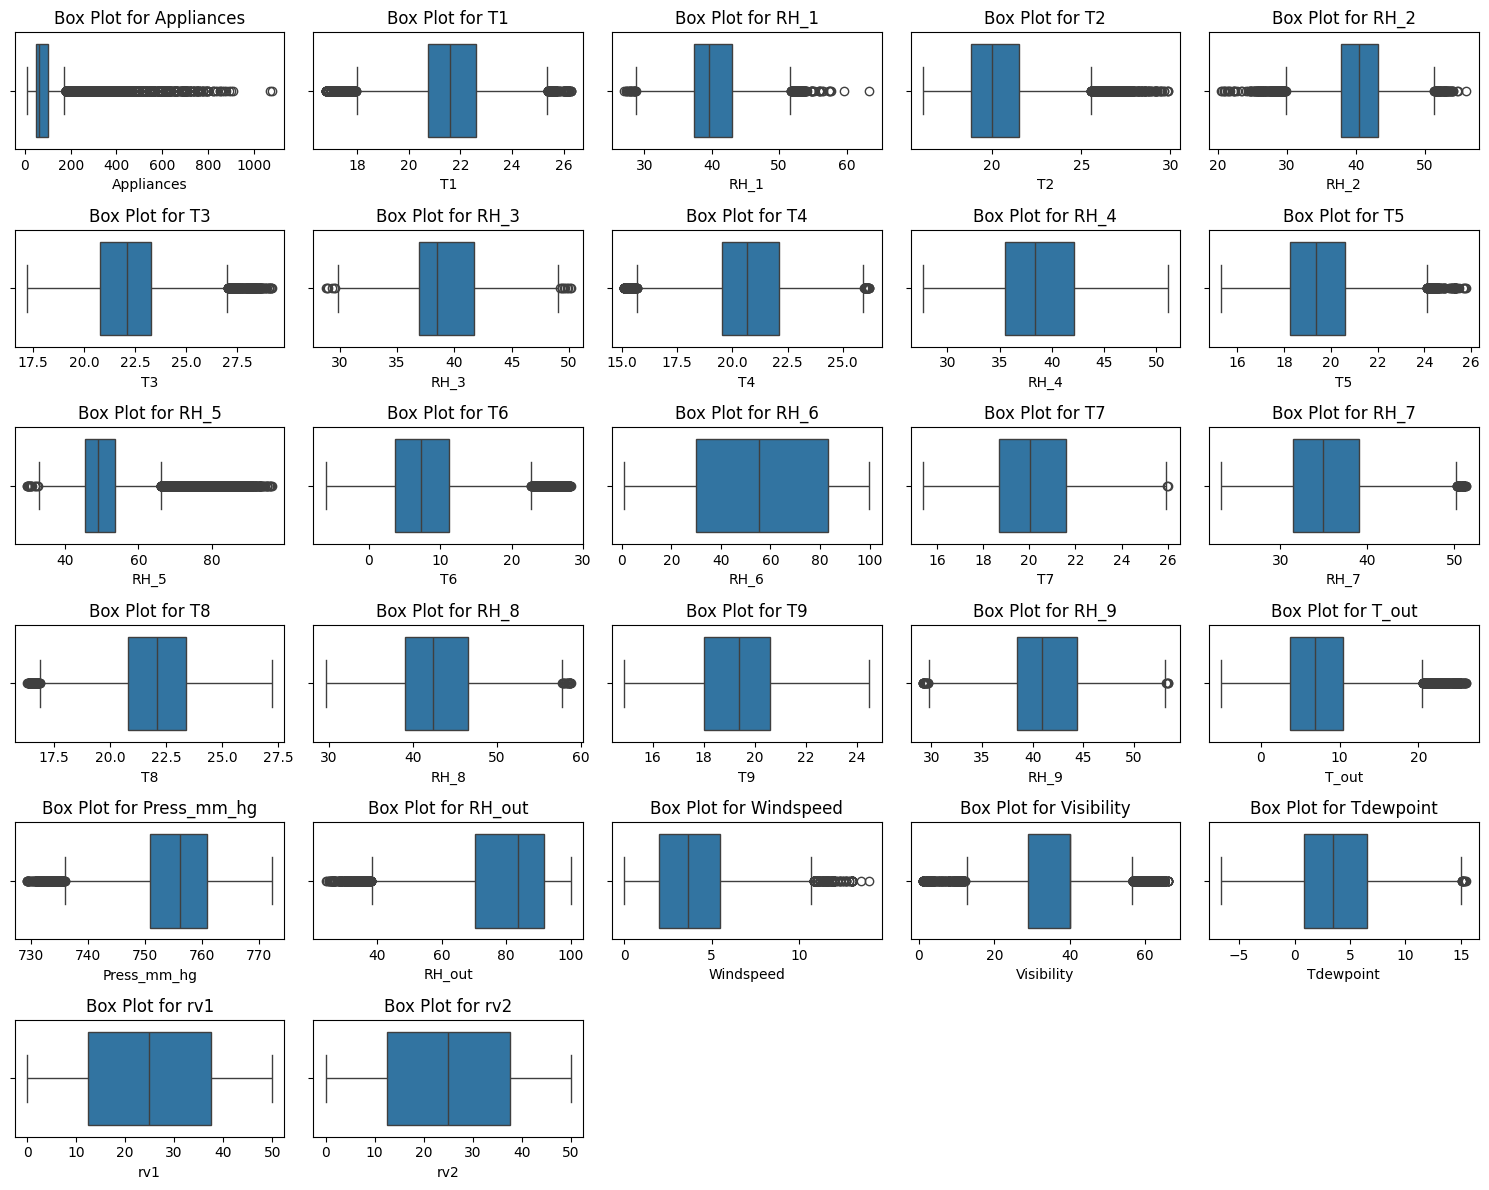

In [36]:
# Fixing the values for number of rows and number of columns needed for the grid
row_count = 6
column_count = 5

# BoxPlot diagram
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(row_count, column_count, i)
    sns.boxplot(x=data[col])
    plt.title(f'Box Plot for {col}')
    plt.xlabel(col)
    plt.tight_layout()
plt.show()

### **Solving Outliers**
#### *To detect outliers, IQR method has been used and to resolve the outliers, Capping method has been used*

In [37]:
# Defining the method for IQR and Capping
def resolve_cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

In [38]:
# Numerical columns with outliers
numerical_columns_with_outliers = numerical_columns.drop(['Appliances','T9','RH_4','RH_6','rv1','rv2']) # Since Appliances is the target column, it is good to make no changes on it

# Applying above function to numerical_columns_with_outliers
for col in numerical_columns_with_outliers:
    data = resolve_cap_outliers(data, col)

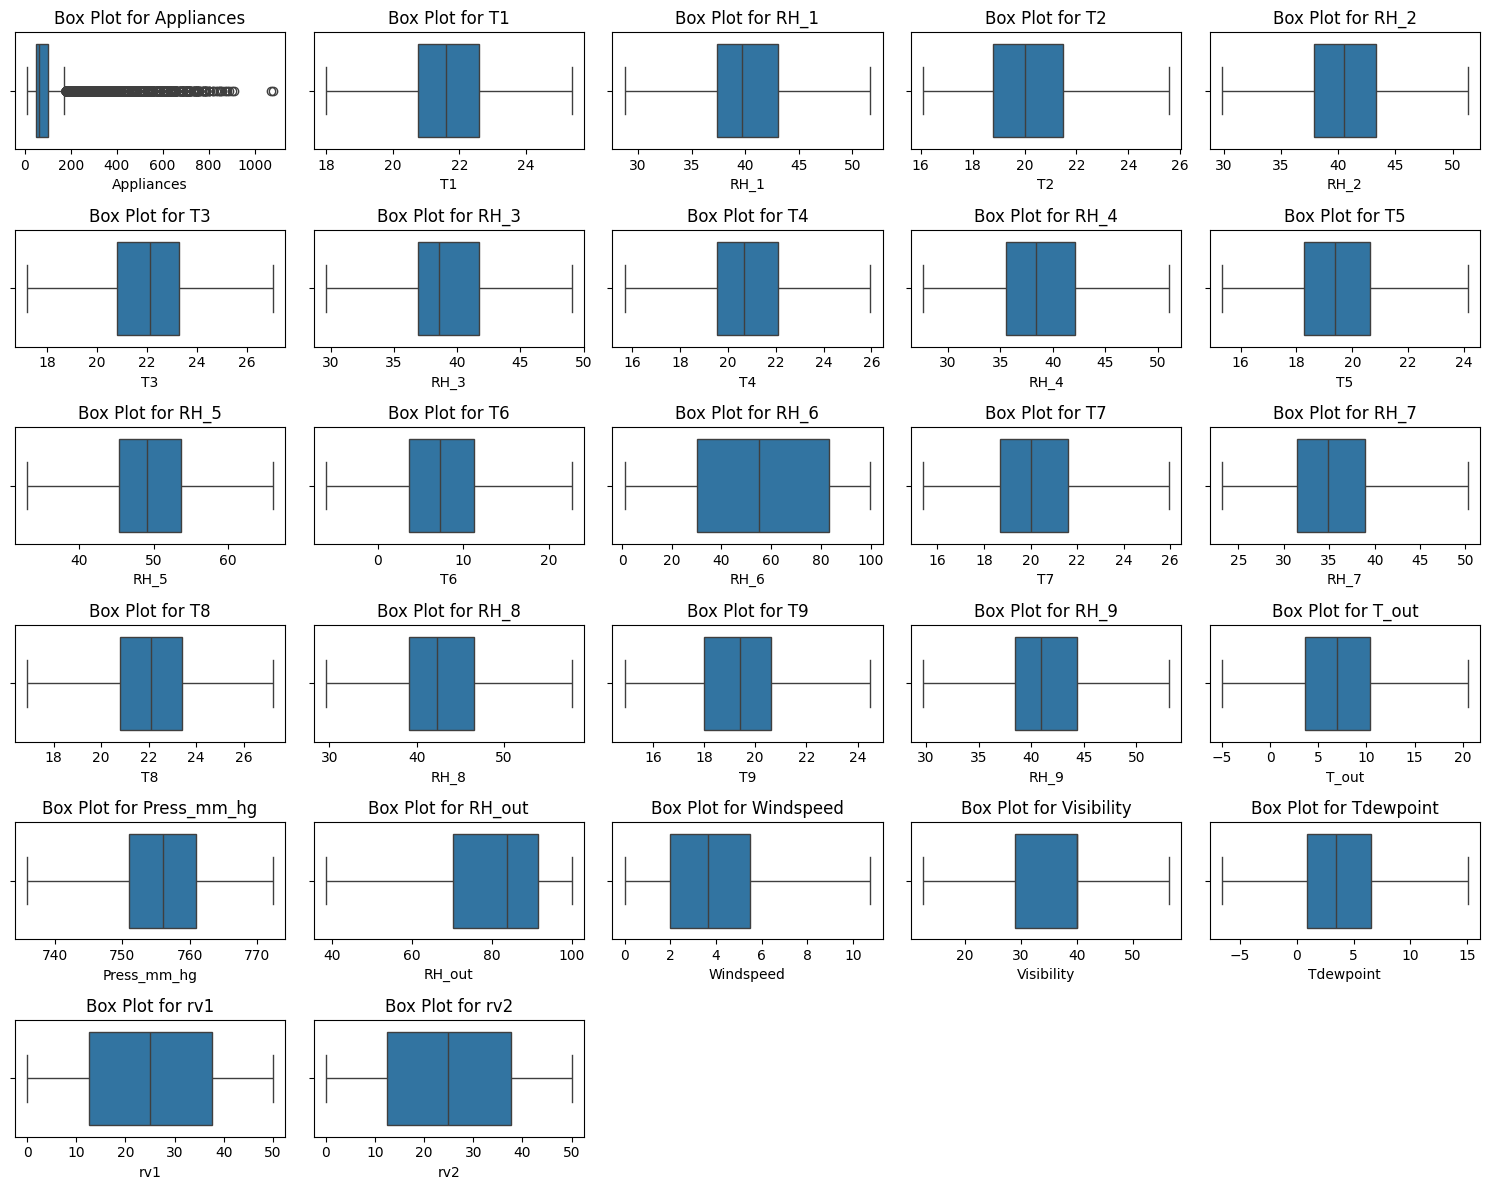

In [39]:
# Visualizing BoxPlot diagram of each numerical columns to check whether outliers are solved
row_count = 6
column_count = 5

# BoxPlot diagram
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(row_count, column_count, i)
    sns.boxplot(x=data[col])
    plt.title(f'Box Plot for {col}')
    plt.xlabel(col)
    plt.tight_layout()
plt.show()

## **Data Scaling and Normalization**

In [40]:
from sklearn.preprocessing import StandardScaler

# Initializing the StandardScaler
scaler = StandardScaler()

In [41]:
# Applying scaler for necessary columns
numerical_features_to_scale = data.drop(columns=['date', 'Appliances'])
scaled_features = scaler.fit_transform(numerical_features_to_scale)

# Create a new DataFrame with the scaled features
scaled_data = pd.DataFrame(scaled_features, columns=numerical_features_to_scale.columns)

# Concatenate the scaled features with the 'date' and 'Appliances' columns
scaled_data = pd.concat([data[['date', 'Appliances']], scaled_data], axis=1)

In [42]:
print(scaled_data.head())

                  date  Appliances    lights        T1      RH_1        T2  \
0  2016-01-11 17:00:00          60  3.301264 -1.139072  1.863478 -0.528718   
1  2016-01-11 17:10:00          60  3.301264 -1.139072  1.634348 -0.528718   
2  2016-01-11 17:20:00          50  3.301264 -1.139072  1.534580 -0.528718   
3  2016-01-11 17:30:00          50  4.561378 -1.139072  1.475395 -0.528718   
4  2016-01-11 17:40:00          60  4.561378 -1.139072  1.543034 -0.528718   

       RH_2        T3      RH_3        T4  ...        T9      RH_9     T_out  \
0  1.092582 -1.245155  1.686863 -0.912635  ... -1.217324  0.958298 -0.147777   
1  1.075633 -1.245155  1.705307 -0.912635  ... -1.200778  0.965526 -0.170232   
2  1.051570 -1.245155  1.749367 -0.948663  ... -1.233869  0.951070 -0.192686   
3  1.042363 -1.245155  1.769859 -0.966677  ... -1.233869  0.926976 -0.215141   
4  1.027297 -1.245155  1.769859 -0.966677  ... -1.233869  0.926976 -0.237595   

   Press_mm_hg    RH_out  Windspeed  Visibility  T

## **Data Splitting**

In [43]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['date', 'Appliances'])
y = data['Appliances'] # Appliances is the target column

# Spliting into train and test sets
# 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Shapes of all sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (15788, 27)
Shape of X_test: (3947, 27)
Shape of y_train: (15788,)
Shape of y_test: (3947,)


## **Saving preprocessed files**

In [44]:
# Saving preprocessed dataset to csv
file_path = "../data/processed/preprocessed_energy_data.csv"
scaled_data.to_csv(file_path, index=False)
print(f"Preprocessed data saved to: {file_path}")

X.to_csv("../data/processed/fields.csv", index=False)
y.to_csv("../data/processed/target_Appliances.csv", index=False)

Preprocessed data saved to: ../data/processed/preprocessed_energy_data.csv
